In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Regression With Categorical Features

We can load some data to try to create a model. 

In [2]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Feature Types

Recall that we have a high level split in the types of data we can deal with - numerical and categorical. We can use numerical features as they are, potentially with the caveat of doing some transformation like scaling. Categorical features, on the other hand, are not so simple to deal with - we need to do something to transform them from a text label into something that a mathematical model can understand.

### Check Feature Types

Usually Pandas will understand the data types correctly, but not always. This is especially a concern when the incoming data is messy. Things like an "n/a" placeholder in a numerical column can cause Pandas to interpret the entire column as a string. This means that we always need to check the data types of our features as one of the first steps in our data exploration. We can also correct the data types if necessary.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(numeric_cols,"\n", cat_cols)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object') 
 Index(['origin', 'name'], dtype='object')


In [5]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

#### Changing Data Types

We can use the `astype` method to change the data type of a column. For example, if we have a column that is a string but should be a number, we can use `df['column'] = df['column'].astype(float)` to convert it. This conversion function will handle almost all of the work for us, but we do need to specify what to do if there are any errors. For this reason, we want to filter out any "junk" before trying the conversion - so filter out the errors and then convert the column. We can also specify what it should do if it finds an error as it is converting:
<ul>
    <li> Raise - raise an error</li>
    <li> Coerce - ignore the error and return NaN</li>
    <li> Ignore - ignore the error and return the original value</li>
</ul>

In most cases, 'coerce' is a good choice. 

In [6]:
df_sample_conversion = df.copy()
df_sample_conversion['mpg'] = df_sample_conversion['mpg'].astype('int64', errors='ignore')

### Visualizing Categorical Features

A boxplot is an excellent choice to visualize the relationship between a categorical feature and a numerical feature. We can use the `seaborn` library to create a boxplot. This allows us to see if the different groups are distributed differently in the target data. 

<Axes: xlabel='origin', ylabel='mpg'>

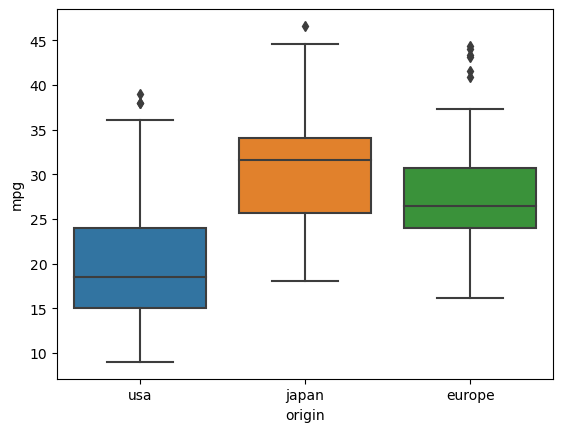

In [7]:
sns.boxplot(x='origin', y='mpg', data=df)

A countplot is also a good choice. This allows us to see how many instances of each category there are.

<Axes: xlabel='origin', ylabel='count'>

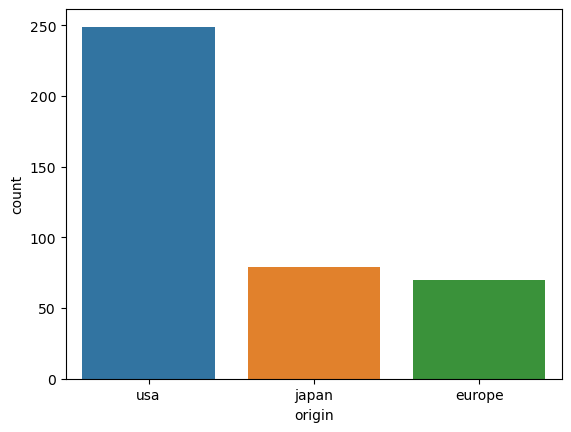

In [8]:
sns.countplot(x='origin', data=df)

### Stats of Categorical Features

We can use the value_counts to get a count of the different categories in a categorical feature. This is a good way to see if there are any categories that are very rare.

In [9]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

## Exercise - Explore the Data

In [10]:
df_exer = sns.load_dataset('glue')
df_exer.head()

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1


## Managing Categorical Features

The categorical features we have here don't really make sense at all in a calculation - we can't use "USA" as a value for our model to calculate or make predictions on. To use categorical features we need to transform them into a numerical form, or encode them. 

### Encoding Categorical Features

Encoding is simple the act of representing a categorical feature in a numerical form. There are a few different ways to do this, but the most common are:
<ul>
    <li> Label Encoding - assign a unique number to each category</li>
    <li> One-Hot Encoding - create a new column for each category and use a 1 or 0 to indicate the presence of that category</li>
</ul>

#### Label Encoding

Label encoding is the most simple of the methods, we simply assign every possible value in a category a numerical label (1,2,3...). So for our sample data, we'd have "USA" -> 1, "Japan" -> 2, "Europe" -> 3 for our 'origin' column. The numbers themselves don't have any meaning, they are just a way to represent the categories in a numerical form.

Label encoding has one big drawback, it introduces an order to the categories that doesn't exist. For example, if we label encode the 'origin' column, we are saying that "USA" is less than "Japan" and "Japan" is less than "Europe". This is not true, and can cause problems in our model. In general, if we are using one number, that number should have meaning if it grows or decreases. This implied order can be good, when that is what the data is actually telling us, for example if we have a column that is "low", "medium", "high" then label encoding may be a good choice. If we have "hair color", then label encoding is likely to yield poor results.

In [11]:
df_label_encoding = df.copy()
df_label_encoding['origin'] = df_label_encoding['origin'].astype('category')
df_label_encoding['origin'] = df_label_encoding['origin'].cat.codes
df_label_encoding.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
128,15.0,6,250.0,100.0,3336,17.0,74,2,chevrolet nova
88,14.0,8,302.0,137.0,4042,14.5,73,2,ford gran torino
47,19.0,6,250.0,100.0,3282,15.0,71,2,pontiac firebird
115,15.0,8,350.0,145.0,4082,13.0,73,2,chevrolet monte carlo s
288,18.2,8,318.0,135.0,3830,15.2,79,2,dodge st. regis
49,23.0,4,122.0,86.0,2220,14.0,71,2,mercury capri 2000
99,18.0,6,232.0,100.0,2945,16.0,73,2,amc hornet
130,26.0,4,122.0,80.0,2451,16.5,74,2,ford pinto
146,28.0,4,90.0,75.0,2125,14.5,74,2,dodge colt
6,14.0,8,454.0,220.0,4354,9.0,70,2,chevrolet impala


#### One-Hot Encoding

In most cases, we want to avoid the implied order that label encoding gives us. For example, if we label encode the 'origin' column, we are saying that "USA" is less than "Japan" and "Japan" is less than "Europe". This is not true, so we want to avoid this. One-hot encoding is a way to do this. We create a new column for each category and use a 1 or 0 to indicate the presence of that category. So for our sample data, we'd have "USA" -> [1,0,0], "Japan" -> [0,1,0], "Europe" -> [0,0,1] for our 'origin' column. In essence, we create a column for each possible category, and that column is a true/false indicator of if that category is true; all of the other possible categories are false. This is where the name "one-hot" encoding originates from - we have a single "hot" (true) value surrounded by "cold" (false) values.

In [12]:
df_one_hot_encoding = df.copy()
df_one_hot_encoding = pd.get_dummies(df_one_hot_encoding, columns=['origin', "name"])
df_one_hot_encoding.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### So Many Columns

In the example above we see lots and lots of columns on our finalized data, largely due to the 'name' feature we started with. Since each possible value in a categorical column gets its own column after the one-hot, we can end up with a lot of columns. This can be a problem for a few reasons:
<ul>
    <li> It can make our data very wide (high dimensional), which can be hard to work with</li>
    <li> It can make our data very sparse, which can be hard to work with</li>
    <li> It increases the amount of data needed to make a good model. </li>
</ul>

If we have categorical columns with lots and lots of options, we usually want to do something to them before using one-hot encoding. In this example, I'm going to drop that column entirely, as I don't think it is needed here. Another option would be to consolidate similar choices into larger groupings, or tossing things that occur very infrequently into an "other" category. This is something that requires domain knowledge, and is a big part of the art of data science.

In [13]:
df_processed = df.drop(columns=['name'])
df_processed = pd.get_dummies(df_processed, columns=['origin'])
df_processed.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
340,25.8,4,156.0,92.0,2620,14.4,81,0,0,1
22,25.0,4,104.0,95.0,2375,17.5,70,1,0,0
271,23.2,4,156.0,105.0,2745,16.7,78,0,0,1
201,18.5,6,250.0,110.0,3645,16.2,76,0,0,1
116,16.0,8,400.0,230.0,4278,9.5,73,0,0,1


#### Drop One

One final note on one-hot encoding - we usually want to drop one of the columns. This is because the information in the dropped column is redundant - if we know that all of the other columns are 0, then the dropped column must be 1. This is called the "dummy variable trap".

This seems odd to a lot of people, but it does make sense if we dig into the details. If we do a one-hot encoding, we end up with one column per category. If we have 3 categories, we end up with 3 columns - one of these columns has a 1, and the rest are 0. In this case, what if all of the columns are 0? We've basically invented a new category, where they are all 0s, that has no meaning from the original data. To resolve this, we drop one of the new columns (normally the first), and the "all blank" status now represents the category that was dropped.

<b>Note:</b> this generally won't make a massive impact on results. This is best practice, but don't obsess over it too much. It is more of a mathematical detail than a critical focus. 

In [14]:
df_processed = df.drop(columns=['name'])
df_processed = pd.get_dummies(df_processed, columns=['origin'], drop_first=True)
df_processed.dropna(inplace=True)
df_processed.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
123,20.0,6,156.0,122.0,2807,13.5,73,1,0
387,38.0,6,262.0,85.0,3015,17.0,82,0,1
146,28.0,4,90.0,75.0,2125,14.5,74,0,1
28,9.0,8,304.0,193.0,4732,18.5,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1


### Categorical Data is Gone

At this point, our categorical data is gone and we have a dataset that is entirely numerical. We can now use this data to create a model just as we have before. 

We can, and should, scale the data just like we did with the numerical data. The dummy columns can be scaled just like any other numerical column, it doesn't matter if we've done one-hot encoding or not.

In [15]:
y = np.array(df_processed['mpg']).reshape(-1, 1)
X = df_processed.drop(columns=['mpg'])
print(X.shape, y.shape)

(392, 8) (392, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(294, 8) (98, 8) (294, 1) (98, 1)


## Exercise

Use the glue data from the previous exercise and encode the categorical features.

## Prepared Data

At this point our data is usable. We likely don't want to manipulate it manually at all at this point, we want to do all of our exploration and manipulation before the get_dummies step here. 

### Data Goals

The data that we start with vary wildly, but the end result of our preparation are always going to be the same:
<ul>
<li> A target (y) value, split into its own array that is one column wide and n rows tall. </li>
<li> A feature (X) array that is n rows tall and m columns wide, where m is the number of features we are using. </li>
    <ul>
    <li> The above two are what we'd have going into the train-test split, and then into the model. </li>
    </ul>
<li> In this data, we need to have accomplished: </li>
    <ul>
    <li> Converted categorical (or any non-numeric) data into a numerical form. </li>
    <li> Outliers and any 'junk' removed or handled. </li>
    <li> Scaled the data. </li>
    <li> Filled in or removed (imputed) any missing data. (Next workbook). </li>
    </ul>
</ul>

The path to get to this point will change from dataset to dataset, but the end goal is always the same (for these types of basic models). Our exploration process is basically the set of steps we need to get here. 

In [17]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Training R2", lr_model.score(X_train, y_train))
print("Testing R2", lr_model.score(X_test, y_test))

Training R2 0.8333755568387833
Testing R2 0.78227397086035


## Data Processing Notes

One key thing to highlight here is that in the near future the process of running our data through these steps can be partially automated, and made easier to manage. We'll soon use something called a pipeline, which basically allows us to specify some steps to take, such as encoding, and set our pipeline to do all of that stuff, concluding with fitting a model. Focus on remembering the steps that we need to take, more than the actual code to do it.

## Exercise - Create Model

Use the glue example data from the previous exercise and create a model.

<b>Note:</b> this dataset is small, so results may swing quite a bit. 

## Exercise - Full Regression Example

Use the data below to create a model predicting the price. The sections I left are suggestions, you can add and change as you see fit.

In [18]:
df_exercise = sns.load_dataset("diamonds")
df_exercise.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Explore

### Process Data

#### Outlier Filters

### Manage Categorical Data

## Self-Check

At this point, there are a few things you can ask to see if you're comfortable with the material. As we've seen mentioned, most of this stuff will be similar in future problems, so it is good to be comfortable with it.
<ul>
<li> Capturing data into a dataframe, and manipulating as needed. </li>
<li> Checking data types and changing them as needed. </li>
<li> Handling outliers. </li>
<li> Encoding categorical data. </li>
<li> Setting a goal for data preparation - an X and y array, each with the right shape. </li>
<li> Scaling data. </li>
<li> Train-test split of data. </li>
<li> Training a model. </li>
<li> Evaluating the results. </li>
</ul>